# Introduction to atmospheric transparency (deprecated)

- author Sylvie Dagoret-Campagne
- creation date : 2023/02/21
- last verification : 2024/01/04

### Use libraries

- getObsAtmo : for atmosphere emulation : https://github.com/LSSTDESC/getObsAtmo/tree/main
- rubinsimphot : a simplified version of rubin_sim : https://github.com/sylvielsstfr/rubinsimphot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re,sys
import pandas as pd

plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'


In [2]:
machine_name = os.uname().nodename

if 'sdf' in machine_name:
    #machine_name_usdf = 'sdfrome001'
    print("Set environment for USDF")
    newpythonpath = os.path.join(os.getenv("HOME"),"repos/repos_w_2023_44/rubinsimphot/src")
    sys.path.append(newpythonpath)
elif 'dagoret-nb' in machine_name:
    print("Set environment for USDF Rubin Science Platform")
    newpythonpath = os.path.join(os.getenv("HOME"),"repos/repos_w_2023_44/rubinsimphot/src")
    sys.path.append(newpythonpath)  
elif 'mac' in machine_name:
    print("Be sure to run this notebook in conda environment named conda_py310")
else:
    print(f"Your current machine name is {machine_name}. Check your python environment")

Be sure to run this notebook in conda environment named conda_py310


In [3]:
from scipy import interpolate

## Imports dedicated to this work

- import the atmospheric transparency emulator (instead of using libradtran code).
- import the fit tools

- import rubin sim

### libradtran emulator

In [4]:
from importlib.metadata import version
the_ver = version('getObsAtmo')
print(f"Version of getObsAtmo : {the_ver}")

Version of getObsAtmo : 0.1.1


In [5]:
from getObsAtmo import ObsAtmo
emul = ObsAtmo()

LSST site name validated as LSST observatory


In [6]:
WL = emul.GetWL()

In [7]:
import sys
sys.path.append('../lib')
#import libAtmosphericFit

In [8]:
from libPhotometricCorrections_auxtel import *

LSST site name validated as LSST observatory


In [9]:
from rubinsimphot.phot_utils import Bandpass, Sed
from rubinsimphot.data import get_data_dir

## Configuration

In [10]:
am0 =1.20    # airmass
pwv0 = 5.0  # Precipitable water vapor vertical column depth in mm
oz0 = 300.  # Ozone vertical column depth in Dobson Unit (DU)
tau0= 0.04 # Vertical Aerosol depth (VAOD) 
beta0 = 1.0# Aerosol Angstrom exponent

In [11]:
pc = PhotometricCorrections(am0,pwv0,oz0,tau0,beta0)

/Users/dagoret/MacOSX/GitHub/LSST/AtmosphericSimulation/rubinsimphot/src/rubinsimphot/phot_utils/bandpass.py:68: UserWarning: Wavelength sampling of 1.0 nm is > 0.2 nm, this may not work well with a Sed object. Consider resampling with resample_bandpass method.
  warnings.warn(


Text(0.5, 1.0, 'Standard atmosphere transmission')

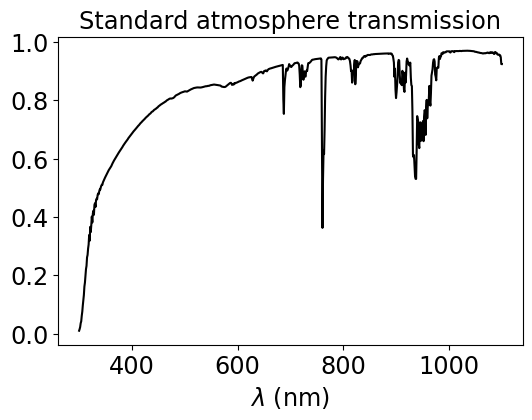

In [12]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
axs.plot(pc.WL,pc.atm_std,'k-')
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Standard atmosphere transmission")

Text(0.5, 1.0, 'Instrument throughput')

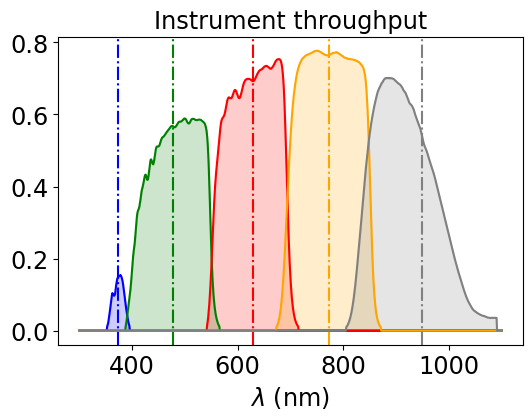

In [13]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
# loop on filter
for index,f in enumerate(filter_tagnames):
    
    axs.plot(pc.bandpass_inst[f].wavelen,pc.bandpass_inst[f].sb,color=filter_color[index]) 
    axs.fill_between(pc.bandpass_inst[f].wavelen,pc.bandpass_inst[f].sb,color=filter_color[index],alpha=0.2) 
    axs.axvline(FILTERWL[index,2],color=filter_color[index],linestyle="-.")
    
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Instrument throughput")

Text(0.5, 1.0, 'Total filter throughput')

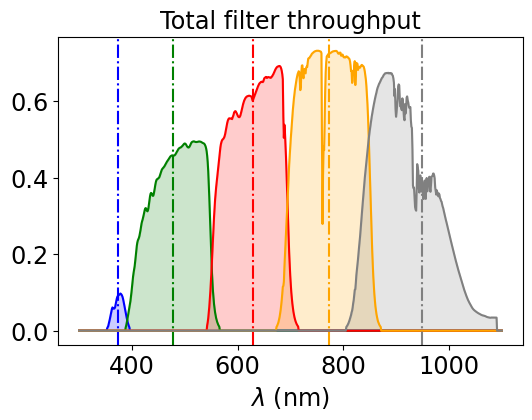

In [14]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
# loop on filter
for index,f in enumerate(filter_tagnames):
    
    axs.plot(pc.bandpass_total_std[f].wavelen,pc.bandpass_total_std[f].sb,color=filter_color[index]) 
    axs.fill_between(pc.bandpass_total_std[f].wavelen,pc.bandpass_total_std[f].sb,color=filter_color[index],alpha=0.2) 
    axs.axvline(FILTERWL[index,2],color=filter_color[index],linestyle="-.")
    
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Total filter throughput")

Text(0.5, 1.0, 'Normalised filter total response $\\phi_b(\\lambda)$')

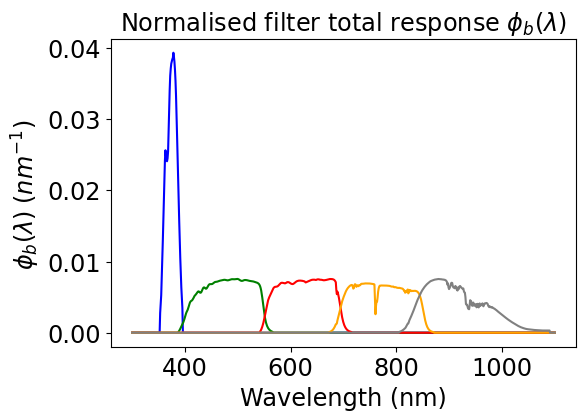

In [15]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
for index,f in enumerate(filter_tagnames):
    ax.plot(pc.WL,pc.phiArray_std[index,:],'-',color=filter_color[index],label = f)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("$\phi_b(\lambda)\; (nm^{-1})$ ")
ax.set_title("Normalised filter total response $\phi_b(\lambda)$")

In [16]:
pc.all_II0_std

{'u': 0.006546096436870393,
 'g': 0.12974050584861474,
 'r': 0.13548055701799144,
 'i': 0.14128735408002832,
 'z': 0.10143704768184487}

In [17]:
pc.all_II1_std

{'u': 0.37721492437827747,
 'g': 2.6386100287128667,
 'r': -2.3579405046508004,
 'i': -1.2995826111079374,
 'z': -34.907850778205734}

In [18]:
am =2    # airmass
pwv = 5.0  # Precipitable water vapor vertical column depth in mm
oz = 300.  # Ozone vertical column depth in Dobson Unit (DU)
ncomp=1     # Number of aerosol components
tau= 0.04 # Vertical Aerosol depth (VAOD) 
beta = 1.0# Aerosol Angstrom exponent

In [19]:
pc.CalculateObs(am,pwv,oz,tau=tau,beta=beta)

Text(0.5, 1.0, 'Standard atmosphere transmission')

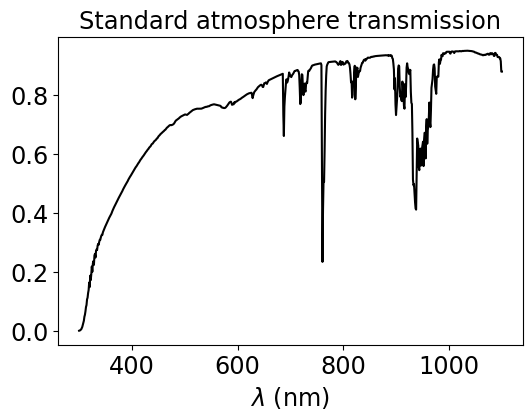

In [20]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
axs.plot(pc.WL,pc.atm_nonstd,'k-')
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Standard atmosphere transmission")

Text(0.5, 1.0, 'Total filter throughput')

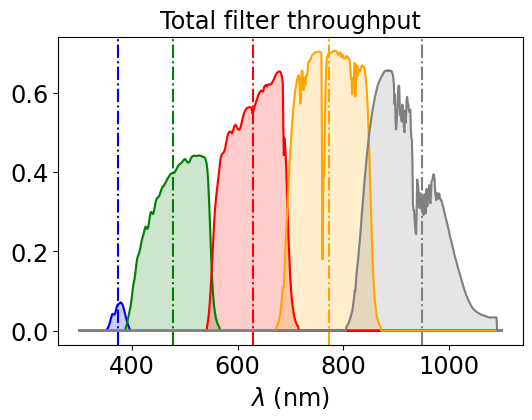

In [21]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
# loop on filter
for index,f in enumerate(filter_tagnames):
    
    axs.plot(pc.bandpass_total_nonstd[f].wavelen,pc.bandpass_total_nonstd[f].sb,color=filter_color[index]) 
    axs.fill_between(pc.bandpass_total_nonstd[f].wavelen,pc.bandpass_total_nonstd[f].sb,color=filter_color[index],alpha=0.2) 
    axs.axvline(FILTERWL[index,2],color=filter_color[index],linestyle="-.")
    
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Total filter throughput")

Text(0.5, 1.0, 'Normalised filter total response $\\phi_b(\\lambda)$')

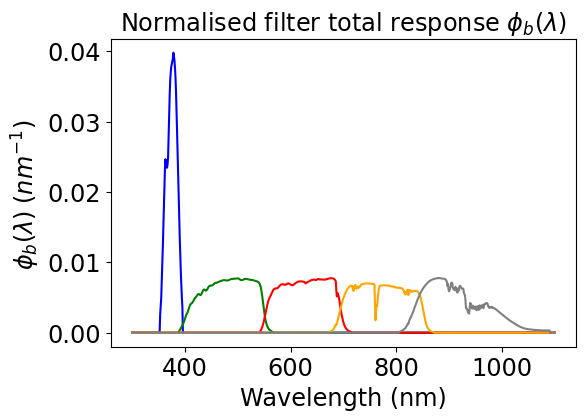

In [22]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
for index,f in enumerate(filter_tagnames):
    ax.plot(pc.WL,pc.phiArray_nonstd[index,:],'-',color=filter_color[index],label = f)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("$\phi_b(\lambda)\; (nm^{-1})$ ")
ax.set_title("Normalised filter total response $\phi_b(\lambda)$")

In [23]:
pc.CalculateMultiObs(np.arange(1,2.5,0.2),pwv,oz,tau,beta)

In [24]:
pc.allcollperfilter

{'u': {'II0_nonstd': array([0.00709358, 0.0065461 , 0.00604121, 0.00557558, 0.00514613,
         0.00475038, 0.00438465, 0.00404761]),
  'II1_nonstd': array([0.30729246, 0.37721492, 0.44698779, 0.51660817, 0.58607391,
         0.65530856, 0.72453092, 0.79351753]),
  'II0ratio_nonstd': array([1.08363525, 1.        , 0.92287185, 0.85174096, 0.78613684,
         0.7256819 , 0.66981139, 0.61832425]),
  'II1sub_nonstd': array([ 0.06992246,  0.        , -0.06977287, -0.13939325, -0.20885899,
         -0.27809364, -0.347316  , -0.4163026 ]),
  'ZPT_nonstd': array([25.02313214, 24.93592433, 24.84877782, 24.76169316, 24.6746697 ,
         24.58779006, 24.50080564, 24.41396503])},
 'g': {'II0_nonstd': array([0.13466384, 0.12974051, 0.12500855, 0.12046012, 0.11608758,
         0.11188718, 0.10784148, 0.10395438]),
  'II1_nonstd': array([2.25801173, 2.63861003, 3.01663555, 3.39207853, 3.76492749,
         4.13480405, 4.50281621, 4.86783942]),
  'II0ratio_nonstd': array([1.03794758, 1.        , 0.9

In [25]:
pc.allparameters

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4])

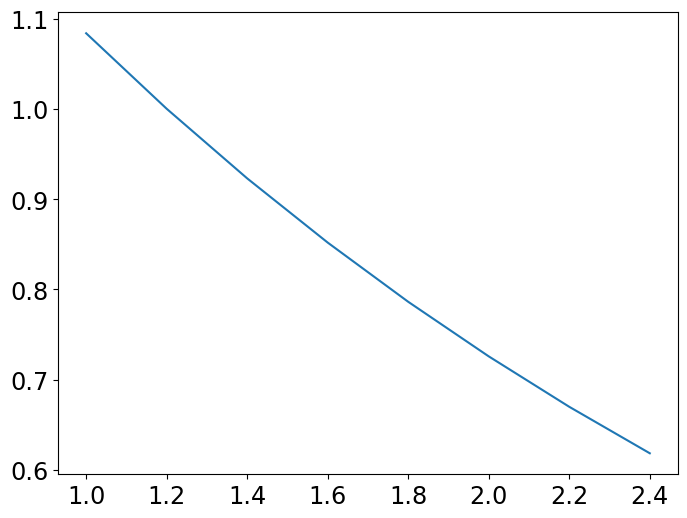

In [26]:
plt.plot(pc.allparameters,pc.allcollperfilter['u']['II0ratio_nonstd'])